# Retail Giant Sales Forecasting Assignment


## Business Problem 

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

## 1. Import the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.metrics import mean_squared_error

## 2. Read and Understand the data

In [2]:
#reading the dataset
data = pd.read_csv('Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
#Checking the shape of the data
data.shape

(51290, 5)

In [4]:
#Checking the overall info f the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


#### Insight: There are no missing values!

In [5]:
#Checking the stats for the numberical columns
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


## 3. Data Preparation

In [6]:
data.head(10)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,07-11-2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


### 3.1 Derive year-month from Order Date column

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


### 3.2 Creating new column "Market_Segment"
The store dataset has the following 5 attributes and their data description is as given below:
 
| Attributes | Description   |
|------|------|
|   Order-Date  | The date on which the order was placed|
|   Segment  | The segment to which the product belongs|
|   Market  | The market to which the customer belongs |
|   Sales | Total sales value of the transaction|
|   Profit   | Profit made on the transaction|
 

If we check the entries in the dataset, we will see that the store caters to 7 different geographical market segments and 3 major customer segments, i.e. consumer, corporate and home as can be seen in the table below.

| Market | Segment   |
|------|------|
|   Africa  | Consumer|
|   APAC (Asia Pacific)  | Corporate|
|   Canada  | Home Office|
|   EMEA(Middle East)  | |
|   EU (European Union)  | |
|   LATAM (Latin America)  | |
|   US (United States)  | |

Based on these, there are 21 unique "Market-Segments" for which the sales forecasts can be made. That is the dataset needs to be prepared such that we get the Order-Date, Sales and Profit for the 21 market segments. <b> We need to create a new column that merges Market and Segment. </b>

In [8]:
data['Market_Segment'] = data['Market']+'_'+data['Segment']
#checking the new column
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [9]:
#verifying that there are 21 unique values in Market_segment using the nunique()
data.nunique().sort_values(ascending=False)

Profit            24575
Sales             22995
Order Date           48
Market_Segment       21
Market                7
Segment               3
dtype: int64

#### Insight: 
1. We can see that the retail store is present in 7 geopgraphical market segments and has 3 major customer types.
2. 7x3 = 21 unique Market_Segments

#### Market-Segment Column

In [10]:
#Market_Segment column
100*round(data.Market_Segment.value_counts(normalize=True),2)

APAC_Consumer         11.0
LATAM_Consumer        10.0
US_Consumer           10.0
EU_Consumer           10.0
APAC_Corporate         6.0
EU_Corporate           6.0
LATAM_Corporate        6.0
US_Corporate           6.0
EMEA_Consumer          5.0
Africa_Consumer        5.0
APAC_Home Office       4.0
LATAM_Home Office      4.0
US_Home Office         3.0
EU_Home Office         3.0
EMEA_Corporate         3.0
Africa_Corporate       3.0
EMEA_Home Office       2.0
Africa_Home Office     2.0
Canada_Consumer        0.0
Canada_Corporate       0.0
Canada_Home Office     0.0
Name: Market_Segment, dtype: float64

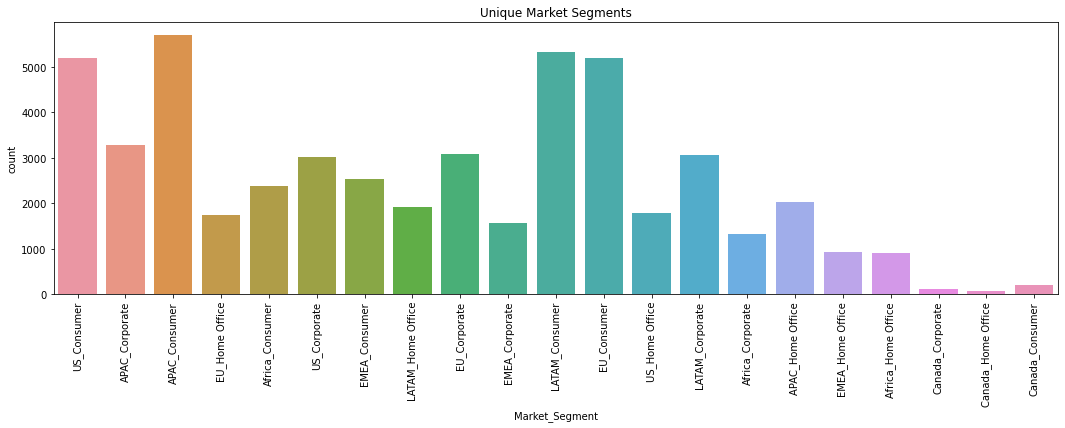

In [11]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='Market_Segment', data=data)
plt.xticks(rotation=90)
plt.title('Unique Market Segments')
plt.show()

#### Insights:
1. APAC_Consumer segment has the highest count, very closely followed by LATAM_Consumer and EU_Consumer
2. Canada_Home Office has the lowest count, with Canada_Corporate and Canada_Consumer above it

**Data is now clean and we can find the most profitable market segment**

### 3.3  Monthly Aggregated data on Profit

In [12]:
data_profit = data.pivot_table(index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')
data_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [13]:
data_profit.shape

(48, 21)

#### We now have 48 months of data for the 21 Market Segments based on profit

### 3.4 Train Test Split

In [14]:
# perform the train-test split such that we take the 42 months as the train data and the 6 months as the test data.
train_len = 42
train = data_profit[0:train_len] # first 42 months as training set
test = data_profit[train_len:] # last 6 months as test set

In [15]:
train.shape

(42, 21)

In [16]:
test.shape

(6, 21)

In [17]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


### 3.5 Coefficient of Variation 

Now, due to certain unpredictable circumstances in the market, as a company, we are prioritizing only the best and most consistent market segment in terms of profitability. We want to see which market segment is the most consistently profitable. And then, we want to forecast the sales for that most consistently profitable market-segment only. This way we know that the market region our company is investing in will be beneficial for the company as the forecasts will be reliable. As of now, we do not want to focus on other market segments that might have not been very consistent and profitable to your company.

So, not all of these 21 market segments are important from the store’s point of view. We need to find out the most consistently profitable market-segment from the above and forecast the sales and demand for that single market-segment only and not for all.

**Now the question is how do you find that most profitable market segment from the 21 market segments? **

By now, it’s clear that we only need to work on one market-segment which is the most consistently profitable. To find the most consistently profitable market-segment we will be using a measure called "Coefficient of Variation (CoV)". 

**The coefficient of variation or CoV is nothing but the ratio of the standard deviation to mean for the data that it is being calculated for.

But why consider the coefficient of variation here and not the standard deviation for measuring how much variation is present in the data for each of the 21 market segments? and how will the coefficient of variation lead us to the most profitable market segment for which eventually we will want to forecast the sales?

The coefficient of variation is a ratio of the standard deviation to mean. 
Once you have prepared the data such that you have the Order-Date, Sales and Profit against each of the 21 market segments, and not in the manner as it was in the initial dataset, we can check the standard deviation and the mean calculated on profit for all the 21 market segments and compare. We will find that these values vary a lot and hence it is meaningless to compare the 21 market segment's profits based on the standard deviation and their mean.

Actually, standard deviations are meaningless to compare different datasets as we would see for these 21 market-segments as well. As a better metric to compare the variance between the segments you use the coefficient of variation which will normalise the standard deviation with the mean and give us a comparative figure on the basis of which you can identify the most profitable market segment.

**As a Sales manager you want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.**

In [18]:
CoV = pd.DataFrame(columns = ['Market_Segment', 'CoV'])
CoV.head()

,Market_Segment,CoV


In [19]:
for i in train.columns:
    temp = {'Market_Segment':i, 'CoV':np.std(train[i])/np.mean(train[i])}
    CoV  = CoV.append(temp, ignore_index = True)

In [20]:
CoV.sort_values(by='CoV')

,Market_Segment,CoV
0,APAC_Consumer,0.522725
1,APAC_Corporate,0.530051
12,EU_Consumer,0.595215
15,LATAM_Consumer,0.683770
13,EU_Corporate,0.722076
16,LATAM_Corporate,0.882177
14,EU_Home Office,0.938072
2,APAC_Home Office,1.008219
18,US_Consumer,1.010530
19,US_Corporate,1.071829


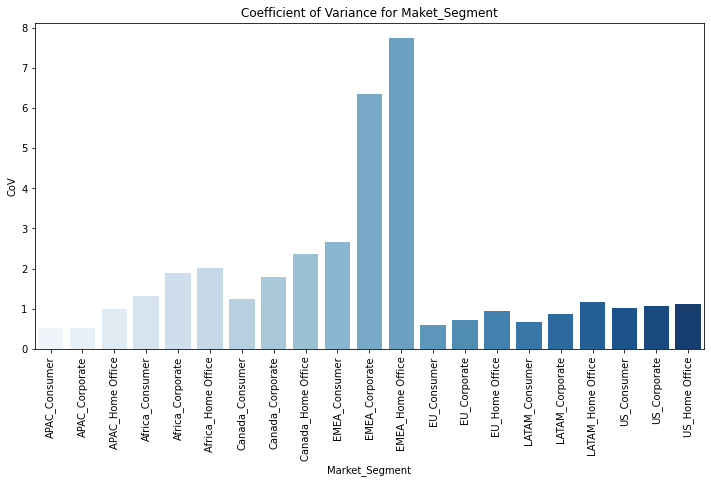

In [21]:
#Plotting the CoV
plt.figure(figsize=(12,6))
sns.barplot(x='Market_Segment', y='CoV', data=CoV, palette='Blues')

plt.title('Coefficient of Variance for Maket_Segment')
plt.xticks(rotation=90)
plt.show()

#### Insights from CoV:
1. Lowest CoV is for APAC_Consumer at 0.523
2. **This implies APAC_COnsumer Market Segment is the most profitable**
3. This segment will be used for forecasting 

## 4. Model Building and Evaluation 

Now that we have found out the most profitable market segment, the next challenge is to forecast the sales for the next 6 months (test data) for that market segment. For forecasting this, we need to check which time series model will work the best. So we decide to apply all the techniques in the Smoothing methods and the ARIMA set of methods and decide to find that out. But even before we start applying each of the techniques, remember the flow chart we learnt at the end of Time Series Forecasting - II.

It helped understand which models to choose based on different problems or datasets. We can simply plot the sales for the concerned market segment, observe the plot and decompose the data into the trend, seasonal and residual components. Based on these insights, we can go back to the flow chart taught in the conceptual lectures and conclude which method as per the flow chart should suit best from the smoothing technique and similarly which method will work best for predicting the sales using the ARIMA set of techniques. Obviously this depends on whether you observe any seasonality or not and other factors after we decompose the time series data for that particular market segment.

After checking this, we should apply all the models in the smoothing techniques and ARIMA set of techniques (except ARIMAX and SARIMAX) and forecast the sales for the next 6 months. We will compare their forecast plots and also find their MAPE values and keep comparing the MAPE values by adding them in the same table (this is similar to what the SME used in the notebook used in the lecture).

#### Steps for Model building and evaluation

1. We can drop the data for the rest 20 market segments and keep only the one for the market segment that we found to be the most consistently profitable.
2. Perform the train-test split for that market segment that takes the 42 months data as the train data and the 6 months data as the test data.
3. Decompose the time-series to get an idea of the trend, seasonality and residual parts of the data (refer to the lecture notes for this).
4. Go to the flow chart and see what method in the smoothing technique and the ARIMA set of methods will work here.
5. Now we will simply apply all the below methods and see the hypothesis you formed from the flowchart was correct or not based on the forecast plots and their MAPE values
    - Simple exponential smoothing
    - Holt’s exponential smoothing
    - Holt-Winters’ exponential smoothing - Additive
    - Holt-Winters’ exponential smoothing - Multiplicative
6. Check the forecast plot calculated on the test data and also the MAPE values for each of the above methods. (keep adding the MAPE values in a single table to compare them)
7. Conclude the method in the smoothing techniques whose forecast is able to predict the sales closer to the actual values and whose MAPE values is the least among all the methods done above. Check if this matches with what you found out from the flow chart.

Next, we are to apply the ARIMA set of techniques and check the sales forecast there. But here we will have to use the box-cox transformation and differencing to make the time-series stationery. For the box-cox transformation, we should use the value of lambda = 0. Note, we perform the box-cox on the entire dataset of that market segment and then train-test split it again before proceeding to the ARIMA set of methods. (Refer to the notebook used in the lectures).

Also, we need NOT plot the PACF and the ACF values and can directly use p=1, q=1 and d=1 as the forecasts are relatively better for these values. After the above, we can start forecasting the sales for the most profitable market segment using the following:

1. AR model
2. MA model
3. ARMA model
4. ARIMA model
5. SARIMA model
6. Check the forecast plot calculated on the test data and also the MAPE values for each of the above methods. (keep adding the MAPE values in a single table to compare them)
7. Conclude the method whose forecast is able to predict the sales closer to the actual values and whose MAPE values is the least among all the methods done in the ARIMA above. Check if this matches what we found from the flow chart.
8. Overall, we want the best forecasting method in the smoothing technique as well as the ARIMA set of techniques.

### 4.1 Filter out most profitable Market Segment from data

In [22]:
#new df with only APAC_Consumer data
data_ts = data[data['Market_Segment']=='APAC_Consumer']
data_ts.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-07,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [23]:
data_ts.shape

(5699, 6)

In [24]:
data_ts = data_ts[['Order Date', 'Sales']]
data_ts.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [25]:
#Grouping by Month for Sales
data_ts = data_ts.groupby('Order Date').sum()
data_ts.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [26]:
data_ts.shape

(48, 1)

### 4.2 Converting Order Date Column from DateTime to timestamp 
In the dataset, the column Order-Date which is now the 48 months data is given in the DateTime format. This might give some errors while we apply the modelling techniques. Hence, before we start applying the methods, convert the Order-Date column from "DateTime" to "timestamp" and then start building the models. Thus, we will get a timestamp for each order date now as well.

In [27]:
data_ts = data_ts.to_timestamp()
data_ts.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [28]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


#### We now have the final df where will start the TIme Series Analysis and then forecasting

### 4.3 Time Series Analysis

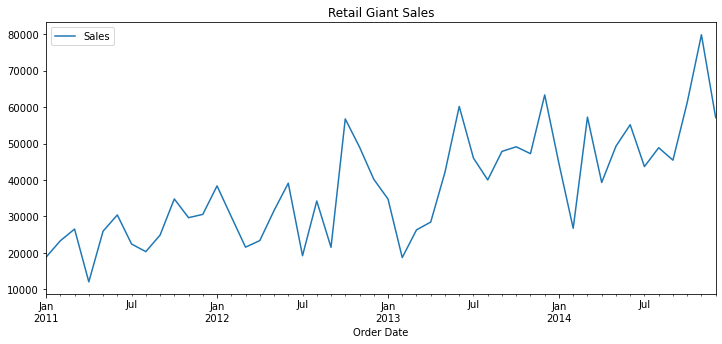

In [29]:
#Plotting the Time Series data
data_ts.plot(figsize=(12,5))

plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

In [30]:
data_ts.isnull().sum()

Sales    0
dtype: int64

#### There are no missing values 

#### Outlier Detection

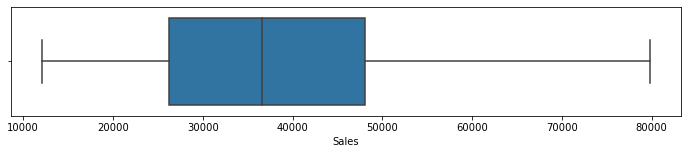

In [31]:
ig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data_ts['Sales'],whis=1.5)

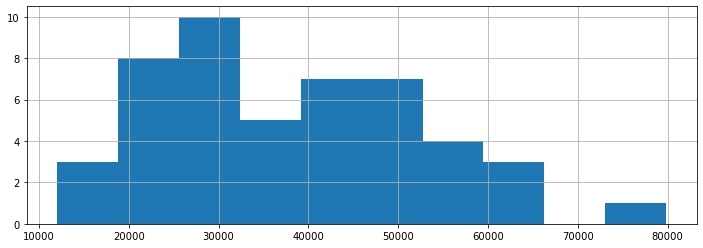

In [32]:
fig = data_ts['Sales'].hist(figsize = (12,4))

#### No extreme values detected

### 4.4 Train-Test Split

Perform the train-test split for that market segment that takes the 42 months data as the train data and the 6 months data as the test data.

In [33]:
train_len = 42
train = data_ts[0:train_len] #first 42 months as Train
test = data_ts[train_len:] #last 6 months as Test

### 4.5 Time Series Decomposition 
Lets understand how a time series can be split into its various components that is the Trend, Seasonality, and residuals

#### Aditive seasonal decomposition

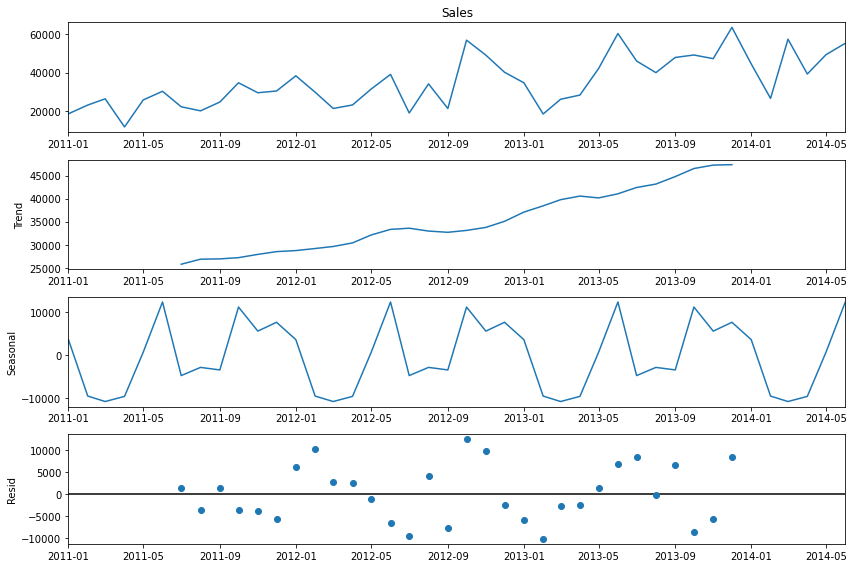

In [34]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

##### Insights:
1. Shows an overall positive Trend
2. There is some seasonality, will be covered in detail later

#### Multiplicative Seasonal Decomposition 

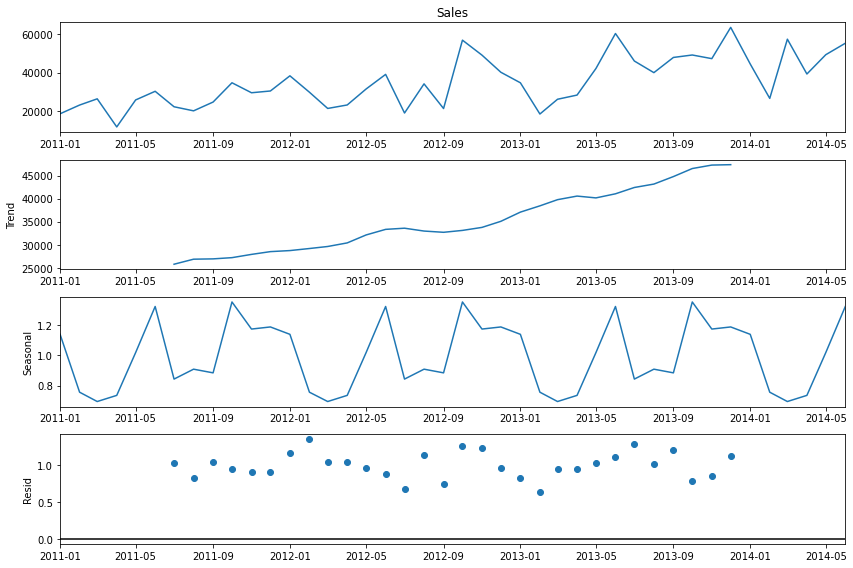

In [35]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # additive seasonal index
fig = decomposition.plot()
plt.show()

##### Insights:
1. Shows an overall positive Trend
2. There is some seasonality, will be covered in detail later

## 5. Model building and evaluation of time series forecast 

### 5.1 Exponential Smoothing Methods
#### 1.Simple Exponential Smoothing 

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)

model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Plot for forecast

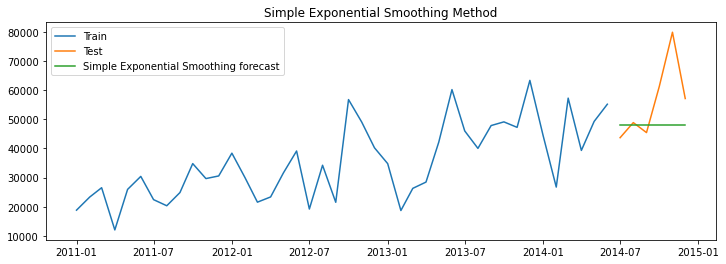

In [37]:
#size
plt.figure(figsize=(12,4))
#plots
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing forecast')
#formatting
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

INSIGHTS:
1. Only level is captured
2. This method isn't that great as it underforecasts

RMSE and MAPE calculation 

In [38]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)
#storing these values in a new df to compare all other methods 
results = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74


#### 2. Holt's Exponential Smoothing

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Sales'], seasonal_periods=12, trend='additive', seasonal=None)

model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Plot for forecast

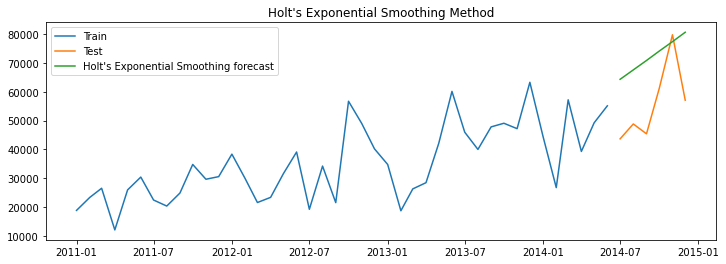

In [40]:
#size
plt.figure(figsize=(12,4))
#plots
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s Exponential Smoothing forecast')
#formatting
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

INSIGHTS:
1. Trend and level are captured
2. Best froecast so far

RMSE and MAPE calculation 

In [41]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Holt\'s Exponential Smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57


#### 3. Holt Winter's Exponential Smoothing - Additive

In [42]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Plot for forecast

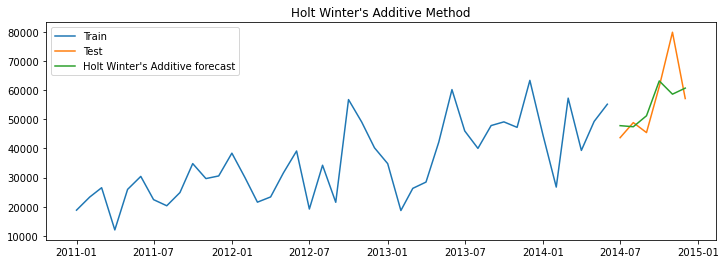

In [43]:
#size
plt.figure(figsize=(12,4))
#plots
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winter\'s Additive forecast')
#formatting
plt.legend(loc='best')
plt.title('Holt Winter\'s Additive Method')
plt.show()

INSIGHTS:
1. Trend and level are captured and some of the seasonality as well
2. Best froecast so far

RMSE and MAPE calculation 

In [44]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hwa_forecast'])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hwa_forecast'])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Holt Winter\'s Additive forecast'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17


Insight:
1. Holt Winter's Additive method has the lowest RMSE and MAPE values.
2. Indicating that it is the best model for forecasting so far

#### 4. Holt Winter's Exponential Smoothing - Multiplicative


In [45]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Plot for forecast

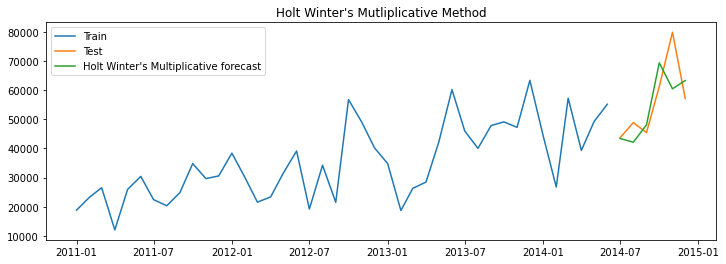

In [46]:
#size
plt.figure(figsize=(12,4))
#plots
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winter\'s Multiplicative forecast')
#formatting
plt.legend(loc='best')
plt.title('Holt Winter\'s Mutliplicative Method')
plt.show()

INSIGHTS:
1. Trend and level are captured and some of the seasonality as well
2. 2nd Best froecast so far

RMSE and MAPE calculation 

In [47]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hwm_forecast'])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Holt Winter\'s Multiplicative forecast'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17
0,Holt Winter's Multiplicative forecast,9423.23,11.43


**INSIGHTS from Simple and Exopnential Smoothing methods:**
1. Holt Winter's Additive Method has the lowest RMSE and MAPE values, inidcatiing that it predicting the vlaues the best so far

### 5.2 Auto Regressive Methods

#### Check for Stationary time series 

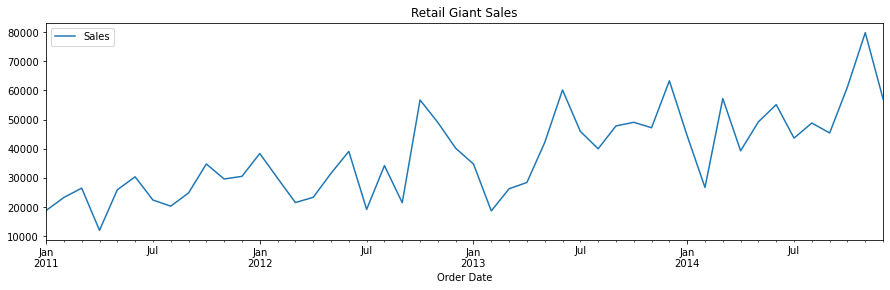

In [48]:
data_ts['Sales'].plot(figsize=(15, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) test
- Null Hypothesis  (H0) : The series is not stationary  p−value>0.05 
- Alternate Hypothesis: (H1)  The series is stationary  p−value<=0.05

In [49]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_ts['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


INSIGHTS:
1. ADF stat < critical value @ 0.05
2. p value, 0.011, < 0.05

Both these statements imply that the time series is stationary and H0 can be rejected

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
- Null Hypothesis  (H0) : The series is stationary  p−value> 0.05 
- Alternate Hypothesis: (H1)  The series is  not stationary  p−value<=0.05

In [50]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_ts['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


INSIGHTS:
1. Critical value @ 0.05 is less than KPSS stat 
2. p value, 0.024, < 0.05

Both these statements imply that the time series is not stationary and H0 can be rejected, Series need to be differenced and transformed

#### Box Cox transformation to make variance constant

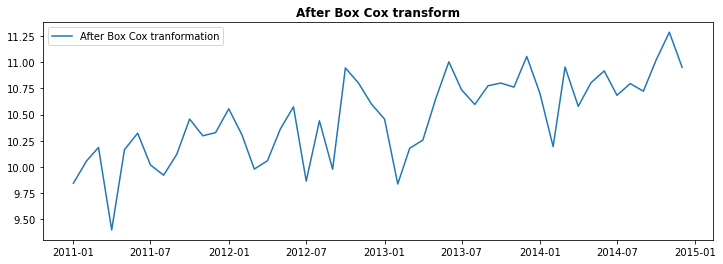

In [51]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data_ts['Sales'], lmbda=0), index = data_ts.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

#### Differencing to remove trend

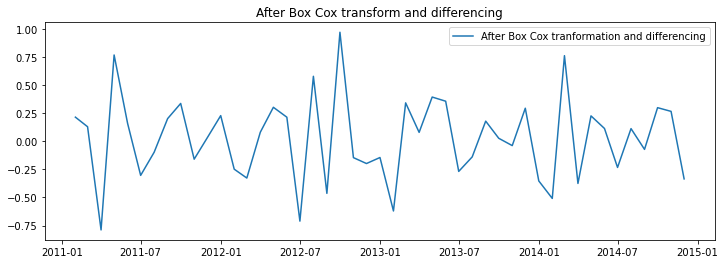

In [52]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_ts.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

Insights:
- The series looks Stationary
- The fluctuations are under constant limits
- The mean is also centered around zero

In [53]:
data_boxcox_diff.dropna(inplace=True)

In [54]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

In [55]:
#ADF TEST

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


Insights:
p value < 0.05, reject H0, series is stationary

In [56]:
#KPSS TEST
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Insights:
KPSS < ciritical value at 0.05 AND p value > 0.05, fail to reject H0.
Implying time series is stationary

#### Splitting Train-Test

In [57]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [58]:
train_data_boxcox_diff.head()

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
Freq: MS, dtype: float64

For ARIMA methods, We will directly use p=1, q=1 and d=1 as the forecasts are relatively better for these values.

#### 1. Auto Regression (AR) method
- Parameter for AR 'p' is calculated using the PACF plot, by finding the highest lag where partial autocorrelation is significantly high
- For this assigment, p =1 will be used

In [59]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) # AR parameter, p =1
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


Recovering the original time series

In [60]:
y_hat_ar = data_boxcox_diff.copy()

y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

Plot train, test, and forecast

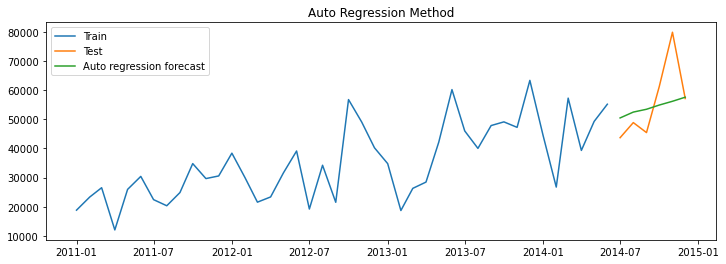

In [61]:
plt.figure(figsize=(12,4))

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')

plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

Insight: Forecast is capturing the trend but not the seasonality

RMSE and MAPE Calculation

In [62]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results df
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17
0,Holt Winter's Multiplicative forecast,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


Insight:
RMSE and MAPE values are slightly higher than HWA.

#### 2. Moving Average (MA) Method
- Parameter 'q', the window size, over which the linear combination of errors are calculated. Found using the ACF plot
- For this assignment q=1 will be used

In [63]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) #q=1
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


Recover the original time series

In [64]:
y_hat_ma = data_boxcox_diff.copy()

y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

Plot train, test, and forecast

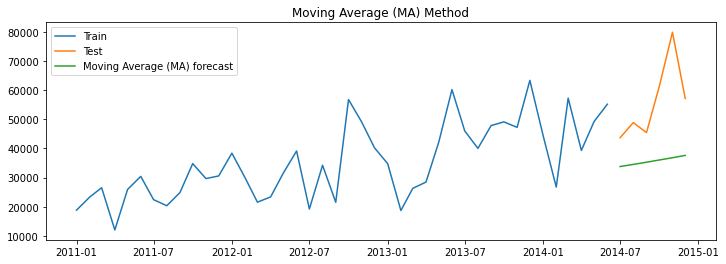

In [65]:
plt.figure(figsize=(12,4))

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving Average (MA) forecast')

plt.legend(loc='best')
plt.title('Moving Average (MA) Method')
plt.show()

Insight: Forecast is capturing the trend but not the seasonality

RMSE and MAPE Calculation

In [66]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results df
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17
0,Holt Winter's Multiplicative forecast,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


Insight:
RMSE and MAPE values are very high. Not a good model

#### 3. Auto Regression Moving Average (ARMA) method
- p=1 and q=1

In [67]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


Recover the original time series

In [68]:
y_hat_arma = data_boxcox_diff.copy()

y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])

y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

Plot train, test, and forecast

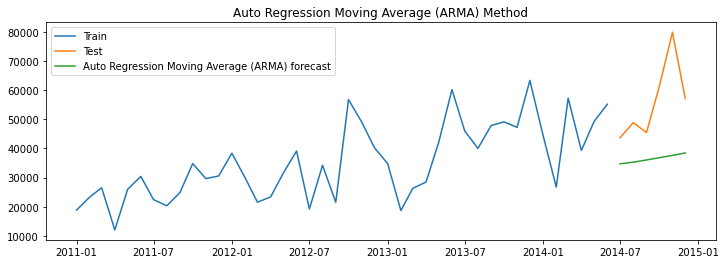

In [69]:
plt.figure(figsize=(12,4))

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto Regression Moving Average (ARMA) forecast')

plt.legend(loc='best')
plt.title('Auto Regression Moving Average (ARMA) Method')
plt.show()

Insight: Forecast is capturing the trend but not the seasonality

RMSE and MAPE Calculation

In [70]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][test.index.min():])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Auto Regression Moving Average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results df
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17
0,Holt Winter's Multiplicative forecast,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Auto Regression Moving Average (ARMA) method,22654.32,32.40


Insight:
RMSE and MAPE values are slightly lower than the MA model but still high. Not a good model

#### 4. Auto Regressive Integrated Moving Average (ARIMA) method

- ARIMA model has three parameters
    - p: Highest lag included in the regression model
    - d: Degree of differencing to make the series stationary
    - q: Number of past error terms included in the regression model
- For this assignment, all 3 will set to 1

In [71]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


Recover the original time series

In [72]:
y_hat_arima = data_boxcox_diff.copy()

y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()

y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])

y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

Plot train, test, and forecast

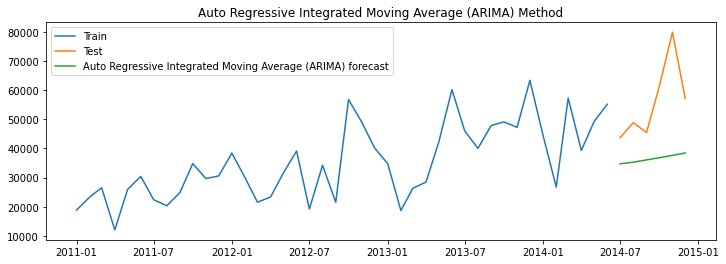

In [73]:
plt.figure(figsize=(12,4))

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='Auto Regressive Integrated Moving Average (ARIMA) forecast')

plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average (ARIMA) Method')
plt.show()

Insight: Forecast is capturing the trend but not the seasonality

RMSE and MAPE Calculation

In [74]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results df
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17
0,Holt Winter's Multiplicative forecast,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Auto Regression Moving Average (ARMA) method,22654.32,32.40
0,Auto Regressive Integrated Moving Average (ARI...,22654.32,32.40


Insight:
RMSE and MAPE values are exactly the same as the ARMA method

#### 5. Seasonal auto regressive integrated moving average (SARIMA)

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041707
ma.L1      -0.996527
ar.S.L12    0.099600
ma.S.L12   -0.966989
sigma2      0.058539
dtype: float64


Recover original time series forecast

In [76]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

Plot train, test and forecast

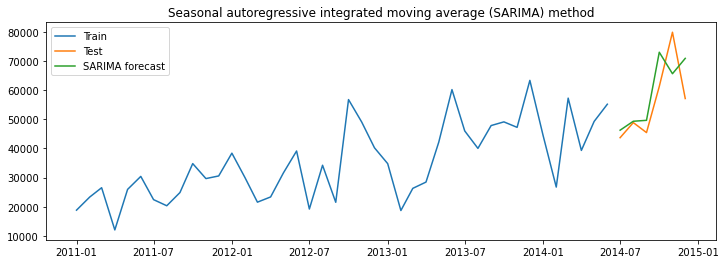

In [77]:
plt.figure(figsize=(12,4))

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')

plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

Insights:
This method captures the level, trend and seasonality 

RMSE and MAPE

In [78]:
#RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)
#temp df
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#concat with results
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing,14627.34,15.74
0,Holt's Exponential Smoothing forecast,18976.37,34.57
0,Holt Winter's Additive forecast,9306.82,10.17
0,Holt Winter's Multiplicative forecast,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Auto Regression Moving Average (ARMA) method,22654.32,32.40
0,Auto Regressive Integrated Moving Average (ARI...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9616.49,12.87


Insights:
1. SARIMA method has the lowest RMSE and MAPE values among all the ARIMA methods and is able to forecast/predict the sales closest to the actual values

## 6. Conclusions
1. From the Simple and Exponential Smoothing methods, Holt Winter's Additive method is the best at forecasting based on plots, RMSE and MAPE values.
2. From the ARIMA methods, the Seasonal autoregressive integrated moving average (SARIMA) method is the best at forecasting based on plots, lowest RMSE and MAPE values (implying higher accuracy).